## Chargement des fichiers 

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import statsmodels.formula.api as sm

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans

from statsmodels.tsa.statespace.sarimax import SARIMAX
!pip install pmdarima
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [3]:
store = pd.read_csv("store.csv")

In [4]:
train = pd.read_csv("train.csv" , low_memory = False)

In [5]:
test = pd.read_csv("test.csv")

## Analyse du fichier "Train"

In [7]:
train.shape

(1017209, 9)

In [8]:
train.info 

<bound method DataFrame.info of          Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
0            1          5  2015-07-31   5263        555     1      1   
1            2          5  2015-07-31   6064        625     1      1   
2            3          5  2015-07-31   8314        821     1      1   
3            4          5  2015-07-31  13995       1498     1      1   
4            5          5  2015-07-31   4822        559     1      1   
...        ...        ...         ...    ...        ...   ...    ...   
1017204   1111          2  2013-01-01      0          0     0      0   
1017205   1112          2  2013-01-01      0          0     0      0   
1017206   1113          2  2013-01-01      0          0     0      0   
1017207   1114          2  2013-01-01      0          0     0      0   
1017208   1115          2  2013-01-01      0          0     0      0   

        StateHoliday  SchoolHoliday  
0                  0              1  
1                  0       

In [9]:
train.describe(include = 'all').round(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,1017209.00,1017209.0,1017209,1017209.00,1017209.00,1017209.00,1017209.00,1017209,1017209.00
unique,NaN,NaN,942,NaN,NaN,NaN,NaN,4,NaN
top,NaN,NaN,2015-07-31,NaN,NaN,NaN,NaN,0,NaN
freq,NaN,NaN,1115,NaN,NaN,NaN,NaN,986159,NaN
mean,558.43,4.0,NaN,5773.82,633.15,0.83,0.38,NaN,0.18
std,321.91,2.0,NaN,3849.93,464.41,0.38,0.49,NaN,0.38
min,1.00,1.0,NaN,0.00,0.00,0.00,0.00,NaN,0.00
25%,280.00,2.0,NaN,3727.00,405.00,1.00,0.00,NaN,0.00
50%,558.00,4.0,NaN,5744.00,609.00,1.00,0.00,NaN,0.00
75%,838.00,6.0,NaN,7856.00,837.00,1.00,1.00,NaN,0.00


In [10]:
train.dtypes

## Il faudra remplacer le format Date par date

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [11]:
valeur_manquante = train.isnull().sum()
print(valeur_manquante)

if valeur_manquante.sum() == 0:
    print("Il n'y a pas de valeur manquante.")
else:
    print("Certaines colonnes ont des valeurs manquantes.")

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64
Il n'y a pas de valeur manquante.


In [12]:
train['Date'] = pd.to_datetime(train['Date'])

periode_debut = train['Date'].min()
periode_fin = train['Date'].max()

print(f"Période de l'historique : {periode_debut.date()} à {periode_fin.date()}")

Période de l'historique : 2013-01-01 à 2015-07-31


In [13]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [14]:
if (train['Sales'] < 0).any():
    print("Certaines ventes ont des valeurs négatives.")
else:
    print("Il n'y a pas de valeur négative.")

Il n'y a pas de valeur négative.


In [15]:
nombre_store = train['Store'].nunique()
print(f"L'étude est faite sur {nombre_store} magasins.")

L'étude est faite sur 1115 magasins.


### Analyse des ventes de ces magasins

In [17]:
# Calcul des indicateurs statistiques
moyenne = round(train['Sales'].mean(),2)
ecart_type = round(train['Sales'].std(),2)
mediane = train['Sales'].median()
q1 = train['Sales'].quantile(0.25)
q3 = train['Sales'].quantile(0.75)

# Afficher les résultats
print("\nIndicateurs statistiques globaux :\n")
print(f"Moyenne : {moyenne}")
print(f"Écart-type : {ecart_type}")
print(f"Médiane : {mediane}")
print(f"Q1 : {q1}")
print(f"Q3 : {q3}")


Indicateurs statistiques globaux :

Moyenne : 5773.82
Écart-type : 3849.93
Médiane : 5744.0
Q1 : 3727.0
Q3 : 7856.0


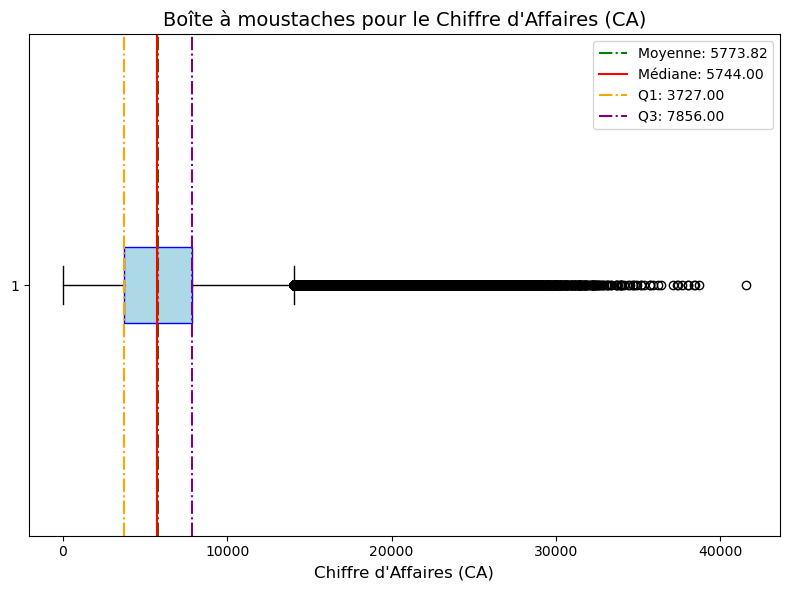

In [18]:

plt.figure(figsize=(8, 6))
plt.boxplot(train['Sales'], vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue", color="blue"), medianprops=dict(color="red"))
plt.title("Boîte à moustaches pour le Chiffre d'Affaires (CA)", fontsize=14)
plt.xlabel("Chiffre d'Affaires (CA)", fontsize=12)

# Ajout des indicateurs statistiques au graphique
plt.axvline(moyenne, color='green', linestyle='dashdot', label=f"Moyenne: {moyenne:.2f}")
plt.axvline(mediane, color='red', linestyle='-', label=f"Médiane: {mediane:.2f}")
plt.axvline(q1, color='orange', linestyle='dashdot', label=f"Q1: {q1:.2f}")
plt.axvline(q3, color='purple', linestyle='dashdot', label=f"Q3: {q3:.2f}")

# Affichage des légendes
plt.legend()
plt.tight_layout()
plt.show()


## Représenter le CA via Boxplot n'est pas forcément très cohérent selon review PROJET 9 - OPCR

In [19]:
valeur_max = train['Sales'].max()
valeur_min = train['Sales'].min()

print(valeur_max)
print(valeur_min)

41551
0


## Analyse du fichier "Store"

In [21]:
store.shape

(1115, 10)

In [22]:
store.dtypes

Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [23]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [24]:
store.info

<bound method DataFrame.info of       Store StoreType Assortment  CompetitionDistance  \
0         1         c          a               1270.0   
1         2         a          a                570.0   
2         3         a          a              14130.0   
3         4         c          c                620.0   
4         5         a          a              29910.0   
...     ...       ...        ...                  ...   
1110   1111         a          a               1900.0   
1111   1112         c          c               1880.0   
1112   1113         a          c               9260.0   
1113   1114         a          c                870.0   
1114   1115         d          c               5350.0   

      CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                           9.0                    2008.0       0   
1                          11.0                    2007.0       1   
2                          12.0                    2006.0       1   
3      

In [25]:
store.describe(include = 'all')

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1115.00000,1115,1115,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000,571
unique,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,a,a,NaN,NaN,NaN,NaN,NaN,NaN,"Jan,Apr,Jul,Oct"
freq,NaN,602,593,NaN,NaN,NaN,NaN,NaN,NaN,335
mean,558.00000,NaN,NaN,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573,NaN
std,322.01708,NaN,NaN,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935,NaN
min,1.00000,NaN,NaN,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000,NaN
25%,279.50000,NaN,NaN,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000,NaN
50%,558.00000,NaN,NaN,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000,NaN
75%,836.50000,NaN,NaN,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000,NaN


In [26]:
missing_data = store.isnull().sum()
print(missing_data)

if missing_data.sum() == 0:
    print("Il n'y a pas de valeur manquante.")
else:
    print("Certaines colonnes ont des valeurs manquantes.")

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64
Certaines colonnes ont des valeurs manquantes.


In [27]:
#On merge ici les deux fichiers afin d'optimiser l'analyse 


dfmerge = pd.merge(train , store, on ="Store" , how="inner")

dfmerge.describe().round(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1017209.00,1017209.0,1017209,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1014567.00,693861.00,693861.00,1017209.0,509178.00,509178.00
mean,558.43,4.0,2014-04-11 01:30:42.846061824,5773.82,633.15,0.83,0.38,0.18,5430.09,7.22,2008.69,0.5,23.27,2011.75
min,1.00,1.0,2013-01-01 00:00:00,0.00,0.00,0.00,0.00,0.00,20.00,1.00,1900.00,0.0,1.00,2009.00
25%,280.00,2.0,2013-08-17 00:00:00,3727.00,405.00,1.00,0.00,0.00,710.00,4.00,2006.00,0.0,13.00,2011.00
50%,558.00,4.0,2014-04-02 00:00:00,5744.00,609.00,1.00,0.00,0.00,2330.00,8.00,2010.00,1.0,22.00,2012.00
75%,838.00,6.0,2014-12-12 00:00:00,7856.00,837.00,1.00,1.00,0.00,6890.00,10.00,2013.00,1.0,37.00,2013.00
max,1115.00,7.0,2015-07-31 00:00:00,41551.00,7388.00,1.00,1.00,1.00,75860.00,12.00,2015.00,1.0,50.00,2015.00
std,321.91,2.0,NaN,3849.93,464.41,0.38,0.49,0.38,7715.32,3.21,5.99,0.5,14.10,1.66


In [28]:
dfmerge.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


## 2. Caractérisez les différentes typologies de magasin

In [30]:
dfmerge['Date'] = pd.to_datetime(dfmerge['Date'])
dfmerge['Day'] = dfmerge['Date'].dt.day
dfmerge['Month'] = dfmerge['Date'].dt.month
dfmerge['Year'] = dfmerge['Date'].dt.year



### Analyse du CA

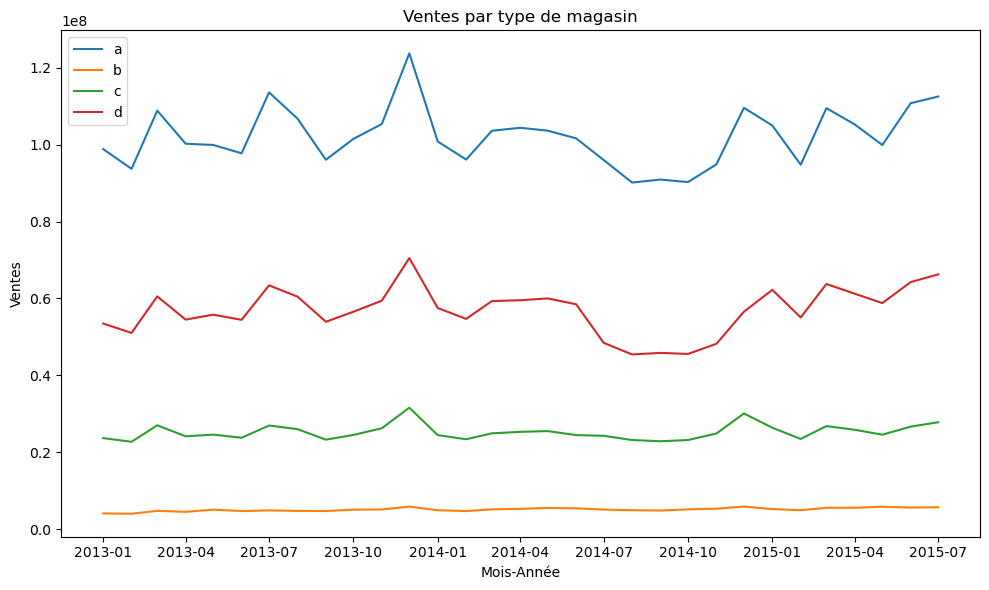

In [32]:

dfmerge['Mois-Année'] = dfmerge['Month'].astype(str) + '-' + dfmerge['Year'].astype(str)
dfmerge['Mois-Année'] = pd.to_datetime(dfmerge['Mois-Année'], format='%m-%Y')

# Grouper par 'StoreType' et 'Mois-Année' puis sommer les ventes
df_grouped = dfmerge.groupby(['StoreType', 'Mois-Année'])['Sales'].sum().reset_index()

# Créer le graphique
fig, ax = plt.subplots(figsize=(10, 6))  # Ajuster la taille du graphique si besoin

# Boucle pour tracer une courbe pour chaque 'StoreType'
for storetype in df_grouped['StoreType'].unique():
    df_temp = df_grouped[df_grouped['StoreType'] == storetype]
    ax.plot(df_temp['Mois-Année'], df_temp['Sales'], label=storetype)

ax.set_xlabel('Mois-Année')
ax.set_ylabel('Ventes')
ax.set_title('Ventes par type de magasin')
ax.legend()
plt.tight_layout()
plt.show()

#1e8 : 100.000.000

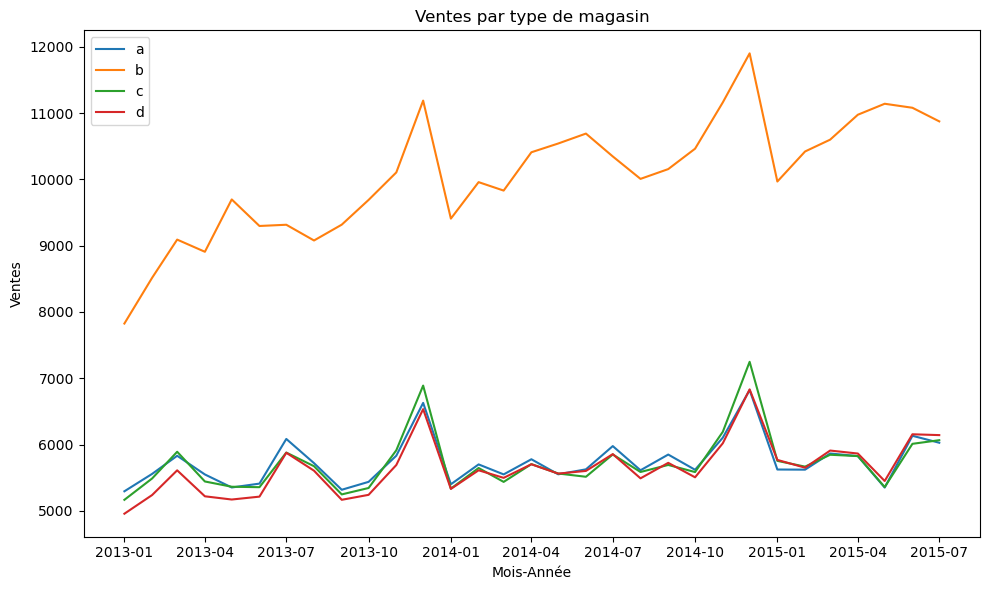

In [33]:

dfmerge['Mois-Année'] = dfmerge['Month'].astype(str) + '-' + dfmerge['Year'].astype(str)
dfmerge['Mois-Année'] = pd.to_datetime(dfmerge['Mois-Année'], format='%m-%Y')

# Grouper par 'StoreType' et 'Mois-Année' puis sommer les ventes
df_grouped = dfmerge.groupby(['StoreType', 'Mois-Année'])['Sales'].mean().reset_index()

# Créer le graphique
fig, ax = plt.subplots(figsize=(10, 6))  # Ajuster la taille du graphique si besoin

# Boucle pour tracer une courbe pour chaque 'StoreType'
for storetype in df_grouped['StoreType'].unique():
    df_temp = df_grouped[df_grouped['StoreType'] == storetype]
    ax.plot(df_temp['Mois-Année'], df_temp['Sales'], label=storetype)

ax.set_xlabel('Mois-Année')
ax.set_ylabel('Ventes')
ax.set_title('Ventes par type de magasin')
ax.legend()
plt.tight_layout()
plt.show()

### Regression linéaire

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     9985.
Date:                Sun, 02 Mar 2025   Prob (F-statistic):               0.00
Time:                        14:22:53   Log-Likelihood:                -33417.
No. Observations:                3768   AIC:                         6.684e+04
Df Residuals:                    3766   BIC:                         6.685e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2761.8140     49.163     56.177      0.0

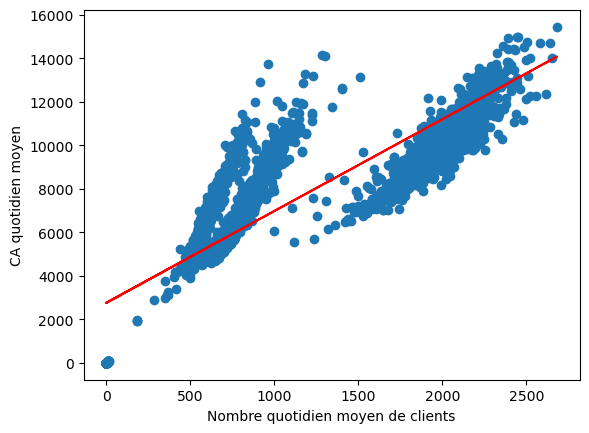

In [35]:
# Calculer le CA quotidien moyen et le nombre de clients quotidien moyen par magasin
df_regression = dfmerge.groupby(['StoreType', 'Date'])[['Sales', 'Customers']].mean().reset_index()

# Ajuster un modèle de régression linéaire
model = sm.ols('Sales ~ Customers', data=df_regression).fit()

# Afficher les résultats de la régression
print(model.summary())


# Tracer le nuage de points
plt.scatter(df_regression['Customers'], df_regression['Sales'])

# Ajouter la droite de régression
plt.plot(df_regression['Customers'], model.predict(df_regression), color='red')

# Définir les labels des axes
plt.xlabel('Nombre quotidien moyen de clients')
plt.ylabel('CA quotidien moyen')

# Afficher le graphique
plt.show()

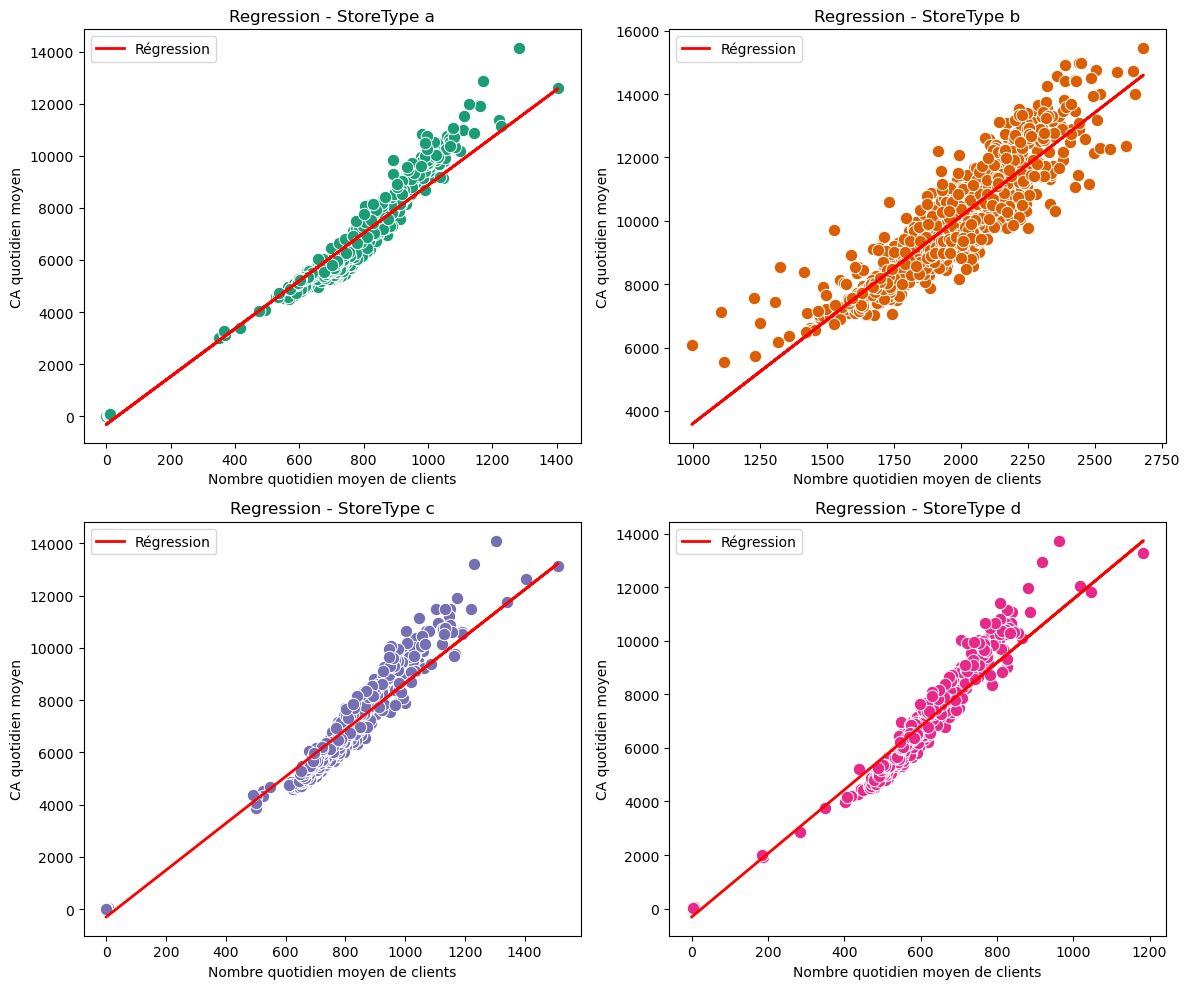

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                 4.082e+06
Date:                Sun, 02 Mar 2025   Prob (F-statistic):               0.00
Time:                        14:22:55   Log-Likelihood:            -9.0214e+06
No. Observations:             1017209   AIC:                         1.804e+07
Df Residuals:                 1017207   BIC:                         1.804e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1077.7365      2.883    373.869      0.0

In [36]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 

# Créer des sous-graphiques (un par StoreType)
store_types = df_regression['StoreType'].unique()
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2x2 pour 4 types de magasins
axes = axes.flatten()  # Aplatir pour faciliter l'accès aux axes

# Boucle pour tracer chaque StoreType
for i, storetype in enumerate(store_types):
    ax = axes[i]
    
    # Filtrer les données
    subset = df_regression[df_regression['StoreType'] == storetype]
    
    # Tracer le nuage de points
    sns.scatterplot(
        data=subset,
        x='Customers',
        y='Sales',
        ax=ax,
        color=sns.color_palette('Dark2')[i],
        s=80
    )
    
    # Ajuster un modèle de régression linéaire
    model = LinearRegression()
    model.fit(subset[['Customers']], subset['Sales'])
    
    # Générer les prédictions pour la ligne de régression
    predicted_sales = model.predict(subset[['Customers']])
    
    # Tracer la ligne de régression
    ax.plot(subset['Customers'], predicted_sales, color='red', linewidth=2, label="Régression")
    
    # Ajouter les titres et légendes
    ax.set_title(f'Regression - StoreType {storetype}', fontsize=12)
    ax.set_xlabel('Nombre quotidien moyen de clients')
    ax.set_ylabel('CA quotidien moyen')
    ax.legend()

# Ajuster l'affichage
plt.tight_layout()
plt.show()

# Ajout d'une constante pour l'interception dans le modèle
X = sm.add_constant(dfmerge['Customers'])  # Ajoute une colonne de 1 pour l'intercept
y = dfmerge['Sales']

# Création et entraînement du modèle OLS
model = sm.OLS(y, X)
results = model.fit()

# Affichage du résumé complet
print(results.summary())


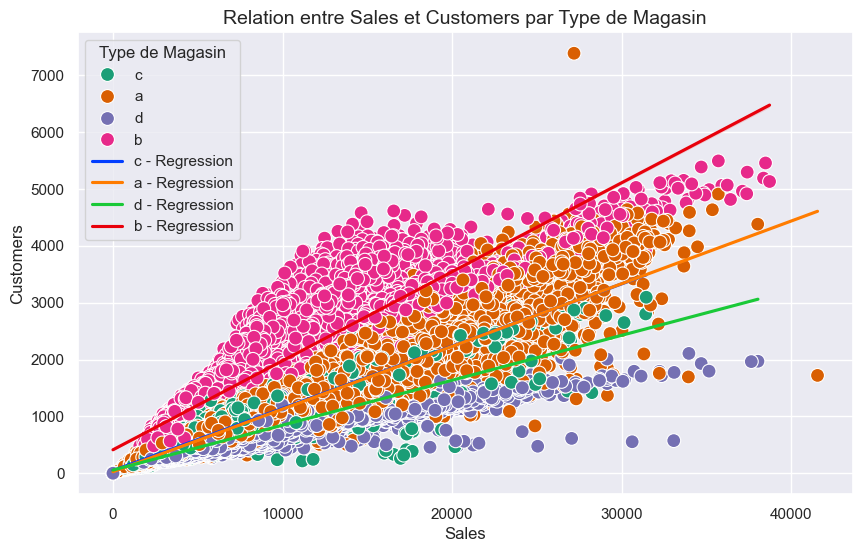

In [37]:
import seaborn as sns
sns.set_theme(style="darkgrid")

plt.figure(figsize=(10, 6))

# Créer le scatter plot avec seaborn
sns.scatterplot(
    data=dfmerge,
    x='Sales',
    y='Customers',
    hue='StoreType',  # Ajoute des couleurs en fonction du type de magasin
    palette='Dark2',  # Palette de couleurs
    s=100  # Taille des points
)

# Ajouter une ligne de régression pour chaque StoreType
for storetype in dfmerge['StoreType'].unique():
    sns.regplot(
        x='Sales',
        y='Customers',
        data=dfmerge[dfmerge['StoreType'] == storetype],
        scatter=False,  # Ne pas afficher les points (déjà affichés)
        color=sns.color_palette('bright')[list(dfmerge['StoreType'].unique()).index(storetype)],  # Utiliser la même couleur que le scatter plot
        label=f'{storetype} - Regression'  # Ajouter un label pour la légende
    )

plt.title('Relation entre Sales et Customers par Type de Magasin', fontsize=14)
plt.xlabel('Sales', fontsize=12)
plt.ylabel('Customers', fontsize=12)
plt.legend(title='Type de Magasin')
plt.grid(True)
plt.show()


### Analyse magasins

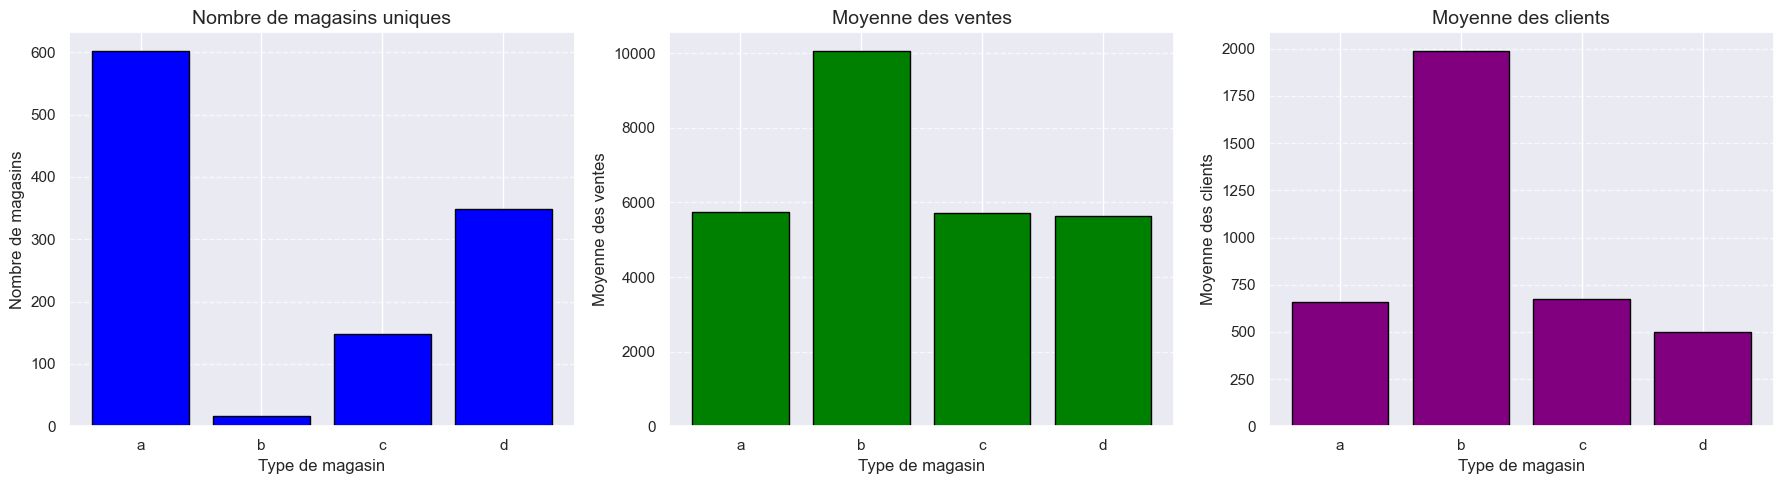

In [39]:
# Calculs des métriques par StoreType
store_counts = dfmerge.groupby('StoreType')['Store'].nunique()
sales_mean = dfmerge.groupby('StoreType')['Sales'].mean()
customers_mean = dfmerge.groupby('StoreType')['Customers'].mean()

# Création du graphique en une seule figure
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Bar graph du nombre de magasins uniques par StoreType
axes[0].bar(store_counts.index, store_counts, color='blue', edgecolor='black')
axes[0].set_title("Nombre de magasins uniques", fontsize=14)
axes[0].set_xlabel("Type de magasin", fontsize=12)
axes[0].set_ylabel("Nombre de magasins", fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Bar graph de la moyenne des ventes par StoreType
axes[1].bar(sales_mean.index, sales_mean, color='green', edgecolor='black')
axes[1].set_title("Moyenne des ventes", fontsize=14)
axes[1].set_xlabel("Type de magasin", fontsize=12)
axes[1].set_ylabel("Moyenne des ventes", fontsize=12)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Bar graph de la moyenne des clients par StoreType
axes[2].bar(customers_mean.index, customers_mean, color='purple', edgecolor='black')
axes[2].set_title("Moyenne des clients", fontsize=14)
axes[2].set_xlabel("Type de magasin", fontsize=12)
axes[2].set_ylabel("Moyenne des clients", fontsize=12)
axes[2].grid(axis='y', linestyle='--', alpha=0.7)

# Ajustement de la mise en page
plt.tight_layout()

# Afficher le graphique
plt.show()


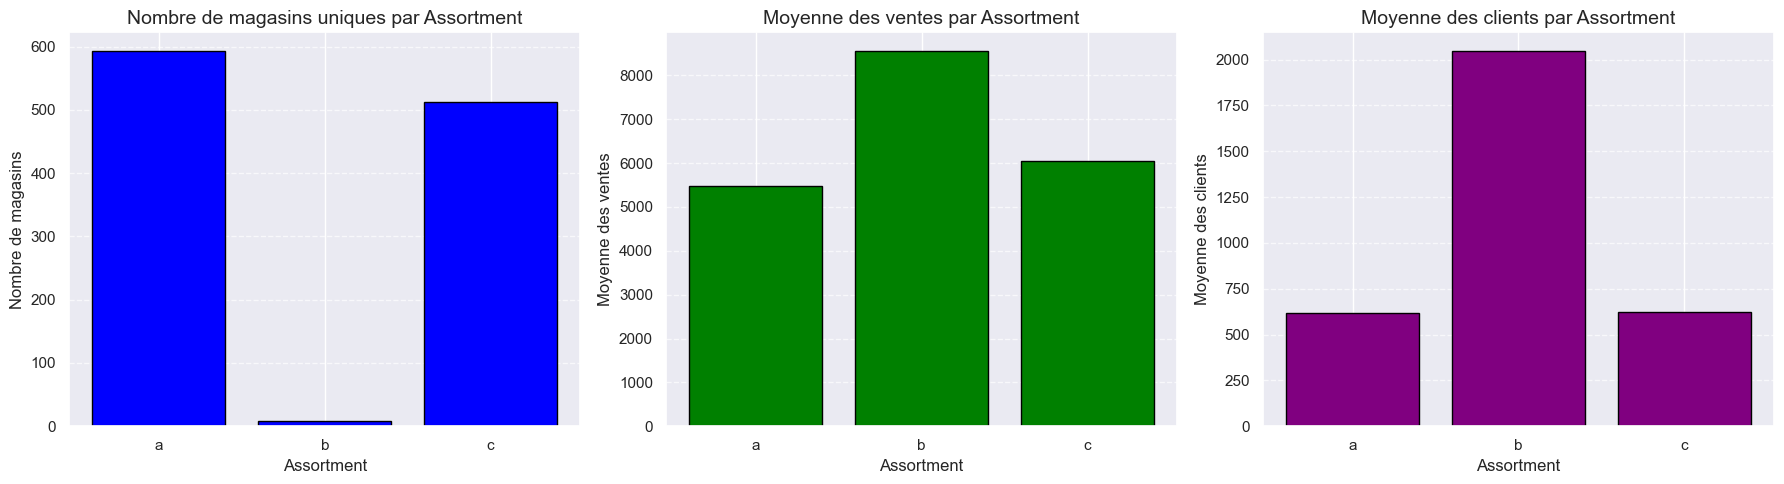

In [40]:
# Calculs des métriques par Assortment
store_counts_assortment = dfmerge.groupby('Assortment')['Store'].nunique()
sales_mean_assortment = dfmerge.groupby('Assortment')['Sales'].mean()
customers_mean_assortment = dfmerge.groupby('Assortment')['Customers'].mean()

# Création du graphique en une seule figure
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Bar graph du nombre de magasins uniques par Assortment
axes[0].bar(store_counts_assortment.index, store_counts_assortment, color='blue', edgecolor='black')
axes[0].set_title("Nombre de magasins uniques par Assortment", fontsize=14)
axes[0].set_xlabel("Assortment", fontsize=12)
axes[0].set_ylabel("Nombre de magasins", fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Bar graph de la moyenne des ventes par Assortment
axes[1].bar(sales_mean_assortment.index, sales_mean_assortment, color='green', edgecolor='black')
axes[1].set_title("Moyenne des ventes par Assortment", fontsize=14)
axes[1].set_xlabel("Assortment", fontsize=12)
axes[1].set_ylabel("Moyenne des ventes", fontsize=12)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Bar graph de la moyenne des clients par Assortment
axes[2].bar(customers_mean_assortment.index, customers_mean_assortment, color='purple', edgecolor='black')
axes[2].set_title("Moyenne des clients par Assortment", fontsize=14)
axes[2].set_xlabel("Assortment", fontsize=12)
axes[2].set_ylabel("Moyenne des clients", fontsize=12)
axes[2].grid(axis='y', linestyle='--', alpha=0.7)

# Ajustement de la mise en page
plt.tight_layout()

# Afficher le graphique
plt.show()


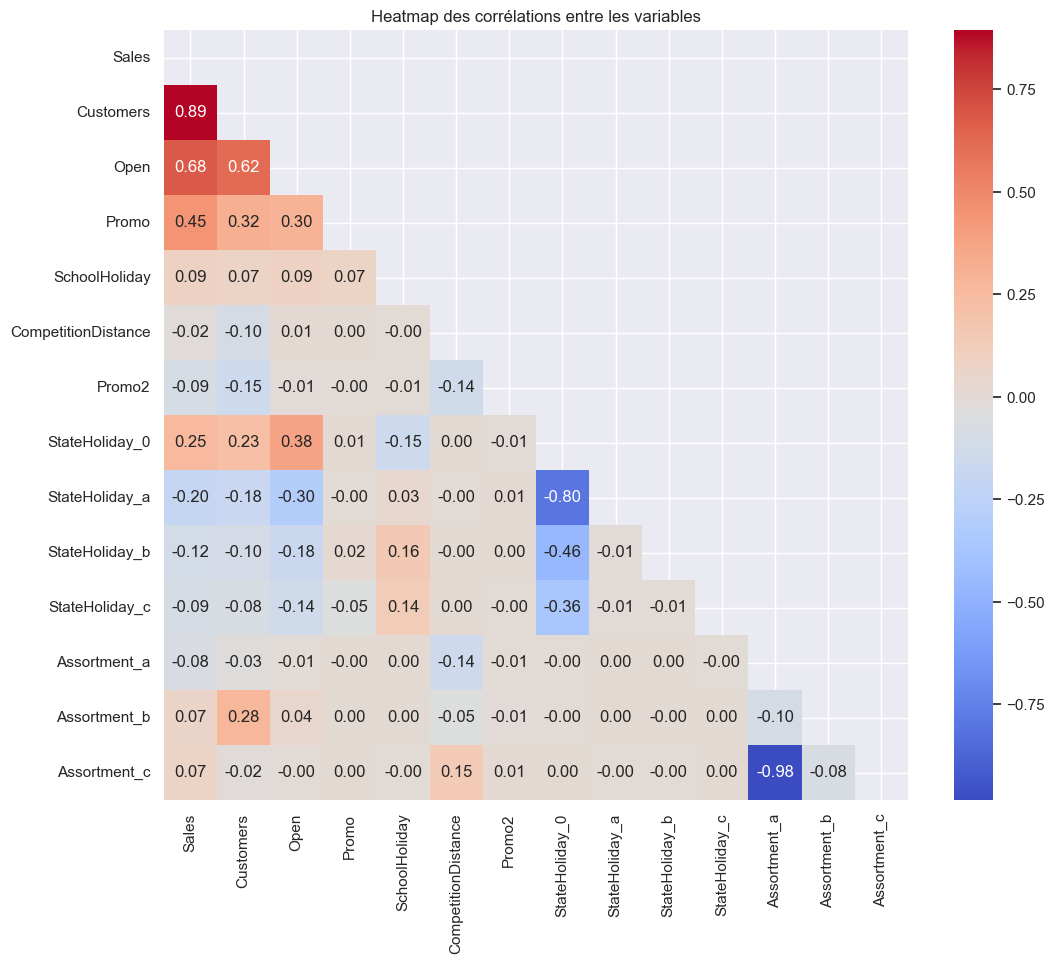

In [41]:
# Sélectionner les colonnes pour la heatmap
columns = ["Sales", "Customers", "Open", "Promo", "StateHoliday", "SchoolHoliday",
    "Assortment", "CompetitionDistance", "Promo2"]
df_heatmap = dfmerge[columns]

# Encoder les colonnes catégorielles avec one-hot encoding
df_heatmap = pd.get_dummies(df_heatmap, columns=[
    "StateHoliday", "Assortment"
])

# Calculer la matrice de corrélation
corr_matrix = df_heatmap.corr()


# Créer un masque pour la partie supérieure du triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Créer la heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", mask=mask)
plt.title("Heatmap des corrélations entre les variables")
plt.show()

### Clusters & K-means

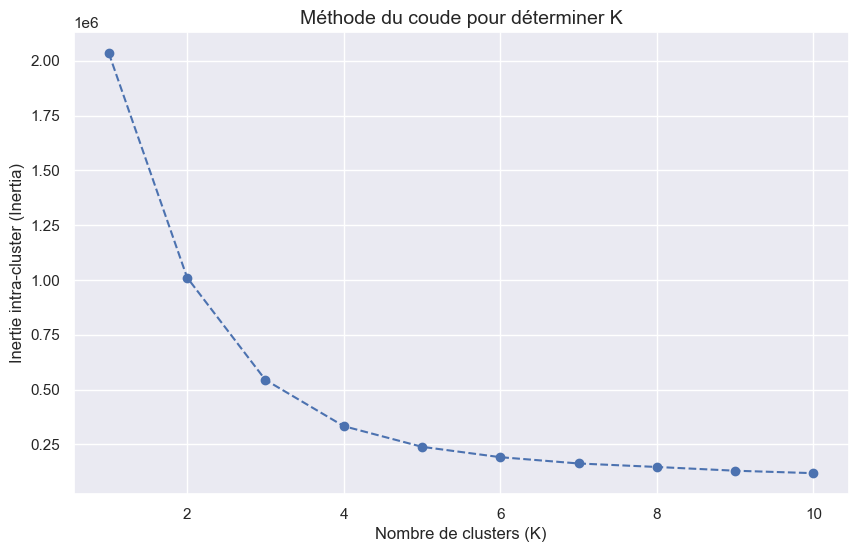

In [43]:
features = ['Sales', 'Customers']  # Remplacez par vos colonnes pertinentes
data = dfmerge[features]

# Étape 2 : Normalisation des données
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Étape 3 : Calcul de l'inertie pour différents K
inertia = []
K_range = range(1, 11)  # Tester de 1 à 10 clusters
for K in K_range:
    kmeans = KMeans(n_clusters=K, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Étape 4 : Visualisation du graphique en coude
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.title("Méthode du coude pour déterminer K", fontsize=14)
plt.xlabel("Nombre de clusters (K)", fontsize=12)
plt.ylabel("Inertie intra-cluster (Inertia)", fontsize=12)
plt.grid(True)
plt.show()

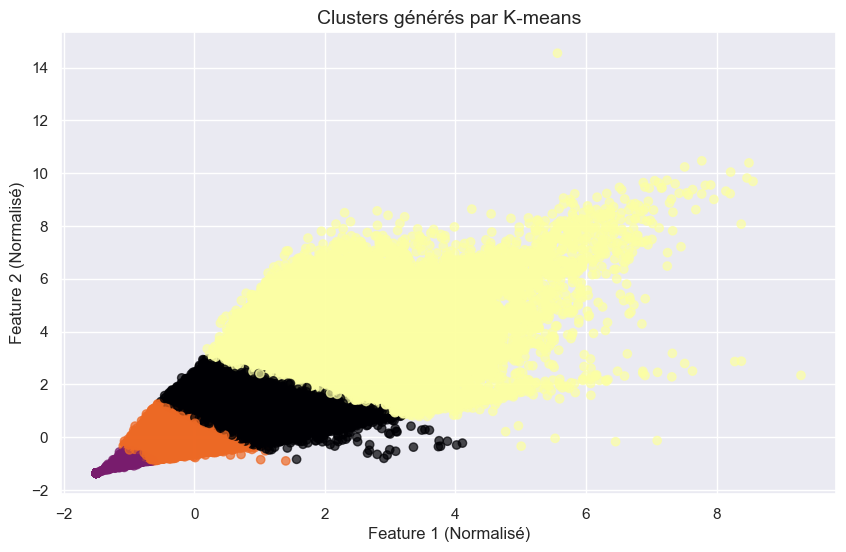

In [44]:
optimal_k = 4  # Remplacez par la valeur obtenue
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
dfmerge['Cluster'] = kmeans.fit_predict(data_scaled)

# Visualisation des clusters
plt.figure(figsize=(10, 6))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=dfmerge['Cluster'], cmap='inferno', alpha=0.7)
plt.title("Clusters générés par K-means", fontsize=14)
plt.xlabel("Feature 1 (Normalisé)", fontsize=12)
plt.ylabel("Feature 2 (Normalisé)", fontsize=12)
plt.grid(True)
plt.show()

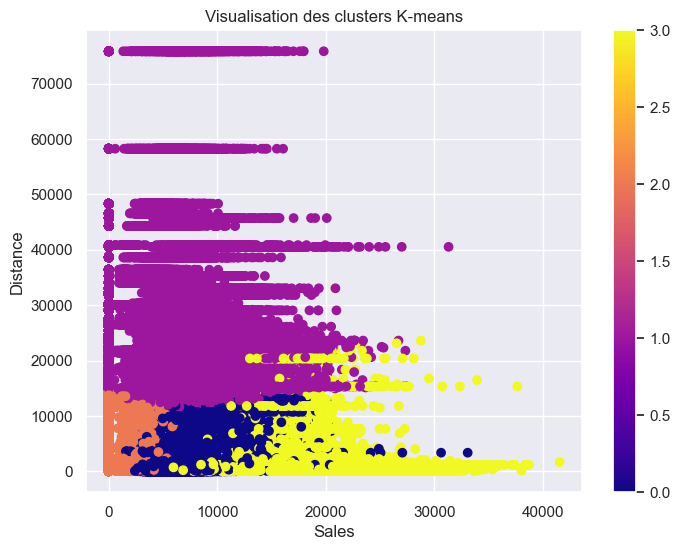

In [45]:
#Seconde vérification 

# K-means avec les colonnes "Customers" & "CompetitionDistance"
X = dfmerge[['Customers', 'CompetitionDistance']]  # Remplacez 'Kilomètre' par le nom de votre colonne

# Imputer les valeurs manquantes avec la moyenne sinon impossible de traiter
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Créer un objet StandardScaler
scaler = StandardScaler()

# Ajuster le scaler aux données et transformer les données
X_scaled = scaler.fit_transform(X_imputed)

# Appliquer K-means aux données normalisées
kmeans = KMeans(n_clusters=4, random_state=42)  # Choisissez le nombre de clusters souhaité
kmeans.fit(X_scaled)

# Obtenir les labels des clusters
labels = kmeans.labels_

# Ajouter les labels au dataframe original
dfmerge['Cluster'] = labels

# Visualiser les clusters
plt.figure(figsize=(8, 6))
plt.scatter(dfmerge['Sales'], dfmerge['CompetitionDistance'], c=dfmerge['Cluster'], cmap='plasma')  # Couleur en fonction du cluster
plt.xlabel('Sales')
plt.ylabel('Distance')  # Remplacez 'Kilomètre' par le nom de votre colonne
plt.title('Visualisation des clusters K-means')
plt.colorbar()  # Afficher la légende des couleurs
plt.show()

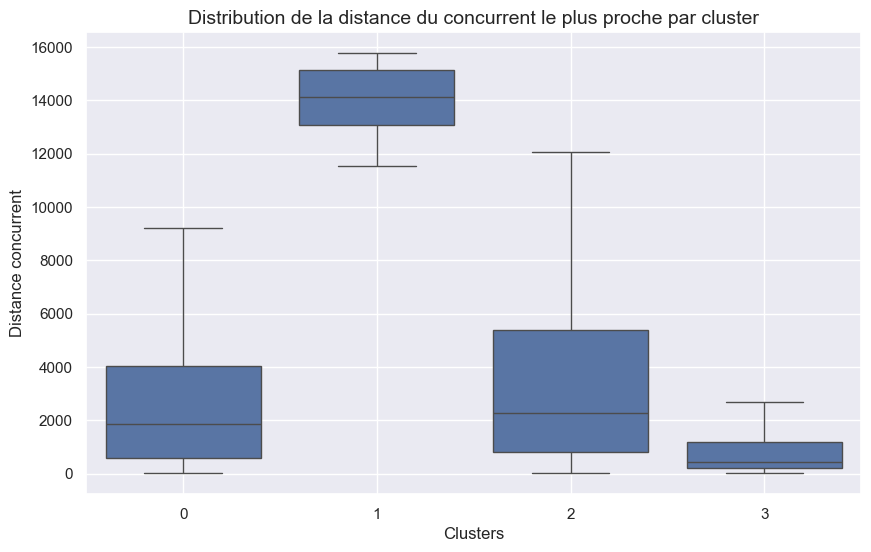

In [126]:

# Retirer les outliers et points pour plus de visibilité 
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Supprimer les outliers de la colonne 'CompetitionDistance'
df_filtered = remove_outliers(dfmerge, 'CompetitionDistance')

plt.figure(figsize=(10, 6))
sns.boxplot(x=df_filtered['Cluster'], y=df_filtered['CompetitionDistance'], showfliers=False)

# Ajout des labels et du titre
plt.xlabel("Clusters", fontsize=12)
plt.ylabel("Distance concurrent", fontsize=12)
plt.title("Distribution de la distance du concurrent le plus proche par cluster", fontsize=14)
plt.grid(True)

# Affichage du graphique
plt.show()


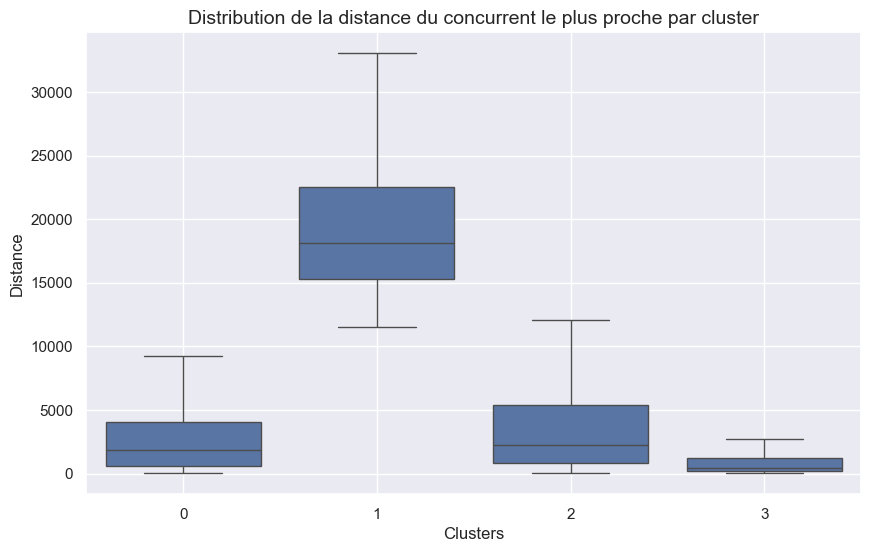

In [158]:
# VERSION AVEC OUTLIERS 
plt.figure(figsize=(10, 6))
sns.boxplot(x=dfmerge['Cluster'], y=dfmerge['CompetitionDistance'], showfliers=False)

# Ajout des labels et du titre
plt.xlabel("Clusters", fontsize=12)
plt.ylabel("Distance", fontsize=12)
plt.title("Distribution de la distance du concurrent le plus proche par cluster", fontsize=14)
plt.grid(True)

# Affichage du graphique
plt.show()

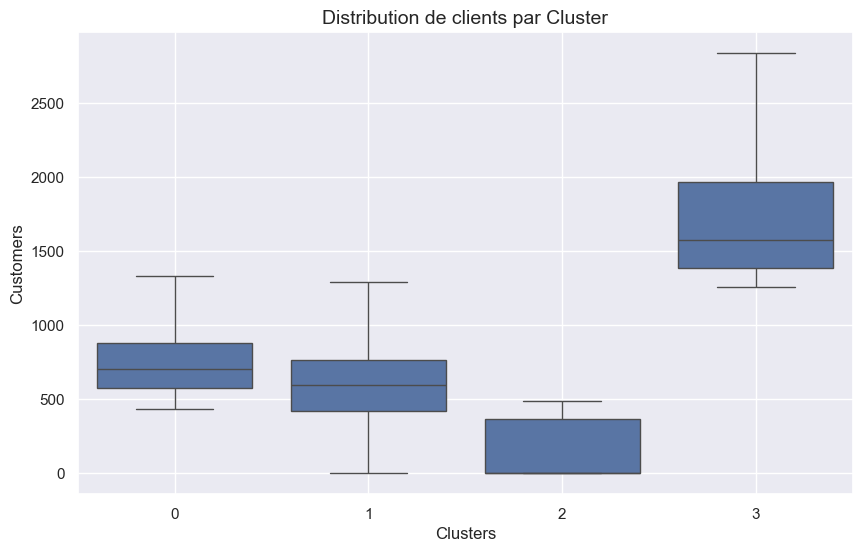

In [152]:
# Création du boxplot avec Customers au lieu de CompetitionDistance, sans outliers ni points
plt.figure(figsize=(10, 6))
sns.boxplot(x=dfmerge['Cluster'], y=dfmerge['Customers'], showfliers=False)

# Ajout des labels et du titre
plt.xlabel("Clusters", fontsize=12)
plt.ylabel("Customers", fontsize=12)
plt.title("Distribution de clients par Cluster", fontsize=14)
plt.grid(True)

# Affichage du graphique
plt.show()

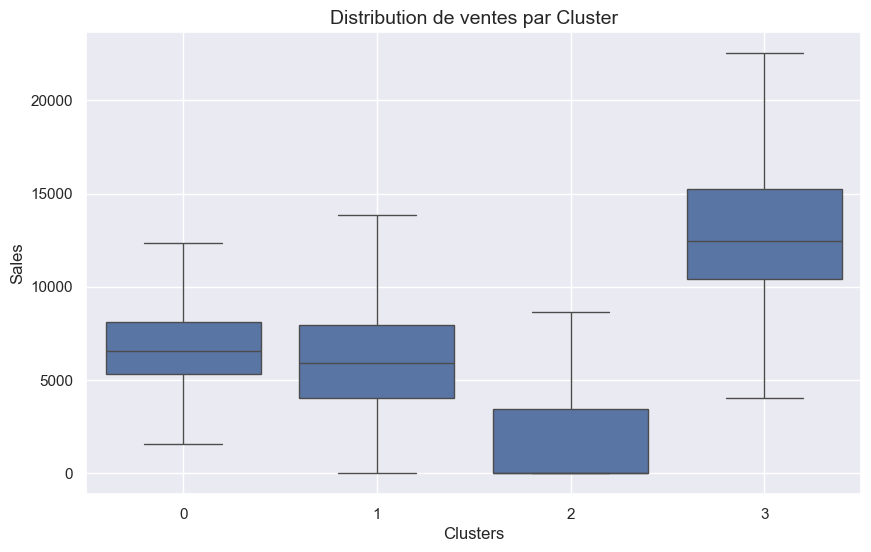

In [166]:
# Création du boxplot avec Customers au lieu de CompetitionDistance, sans outliers ni points
plt.figure(figsize=(10, 6))
sns.boxplot(x=dfmerge['Cluster'], y=dfmerge['Sales'], showfliers=False)

# Ajout des labels et du titre
plt.xlabel("Clusters", fontsize=12)
plt.ylabel("Sales", fontsize=12)
plt.title("Distribution de ventes par Cluster", fontsize=14)
plt.grid(True)

# Affichage du graphique
plt.show()

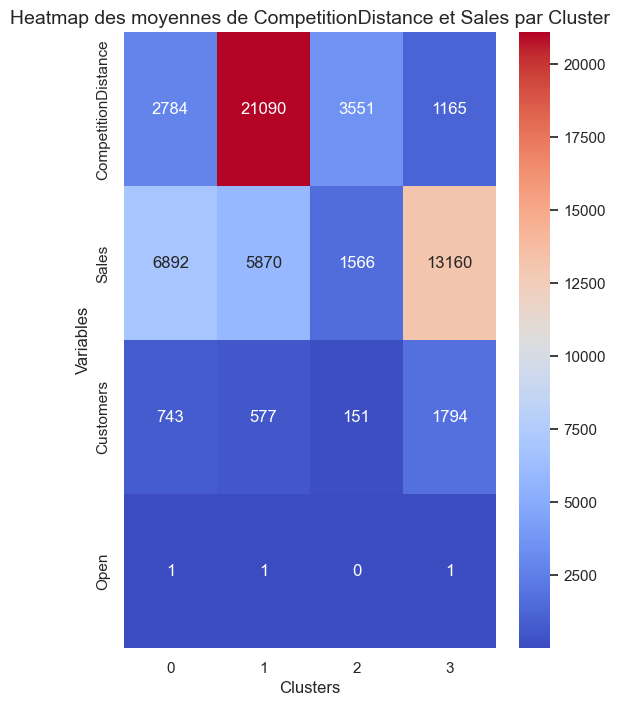

In [146]:
# Création de la heatmap des moyennes de CompetitionDistance et Sales par Cluster
heatmap_data = dfmerge.groupby("Cluster")[["CompetitionDistance", "Sales", "Customers" , "Open" , ]].mean()
plt.figure(figsize=(6, 8))
sns.heatmap(heatmap_data.T, annot=True, cmap="coolwarm", fmt=".0f")

# Ajout des labels et du titre
plt.ylabel("Variables", fontsize=12)
plt.xlabel("Clusters", fontsize=12)
plt.title("Heatmap des moyennes de CompetitionDistance et Sales par Cluster", fontsize=14)

# Affichage du graphique
plt.show()


In [50]:
from sklearn.metrics import pairwise_distances
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Sélection des colonnes utilisées pour le clustering
X = dfmerge[['Customers', 'CompetitionDistance']].copy()

# Imputation des valeurs manquantes avec la moyenne
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Application de KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)

# Ajout des labels au DataFrame
dfmerge['Cluster'] = kmeans.labels_

# Récupération des centroïdes
centroids = kmeans.cluster_centers_

# Calcul des distances entre chaque magasin et le centroïde de son cluster
distances = pairwise_distances(X_scaled, centroids, metric='euclidean')

# Trouver le magasin le plus proche du centroïde pour chaque cluster
representative_indices = np.argmin(distances, axis=0)

# Extraire les magasins représentatifs
representative_shops = dfmerge.iloc[representative_indices]

# Affichage des magasins représentatifs

print(representative_shops)

# 0 : 496
# 1 : 579
# 2 : 126
# 3 : 69


         Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
312532     496          6 2014-10-11   6950        744     1      0   
1001063    579          2 2013-01-15   4277        575     1      0   
184100     126          1 2015-02-16   1981        159     1      1   
625913      69          2 2013-12-17  17727       1798     1      1   

        StateHoliday  SchoolHoliday StoreType  ... CompetitionOpenSinceYear  \
312532             0              0         d  ...                   2015.0   
1001063            0              0         c  ...                   2012.0   
184100             0              0         d  ...                   2014.0   
625913             0              0         c  ...                      NaN   

         Promo2  Promo2SinceWeek  Promo2SinceYear    PromoInterval  Day  \
312532        0              NaN              NaN              NaN   11   
1001063       0              NaN              NaN              NaN   15   
184100        1        

## 3. Construisez un modèle de prévision des ventes

### Préparez le jeu de données pour entraîner le modèle

In [53]:
dfmerge.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Month,Year,Mois-Année,Cluster
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,2008.0,0,NaN,NaN,NaN,31,7,2015,2015-07-01,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",31,7,2015,2015-07-01,0
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",31,7,2015,2015-07-01,1
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,2009.0,0,NaN,NaN,NaN,31,7,2015,2015-07-01,3
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,2015.0,0,NaN,NaN,NaN,31,7,2015,2015-07-01,1


In [54]:
df_merge = dfmerge[['Date', 'Sales', 'Store' , 'Day' , 'Month' , 'Year']].copy()

df_merge.to_csv("dfmerge_export.csv", index=False, encoding='utf-8')

df_merge.head()

,Date,Sales,Store,Day,Month,Year
0,2015-07-31,5263,1,31,7,2015
1,2015-07-31,6064,2,31,7,2015
2,2015-07-31,8314,3,31,7,2015
3,2015-07-31,13995,4,31,7,2015
4,2015-07-31,4822,5,31,7,2015


In [55]:
df_merge.dtypes

Date     datetime64[ns]
Sales             int64
Store             int64
Day               int32
Month             int32
Year              int32
dtype: object

### Moyenne glissante

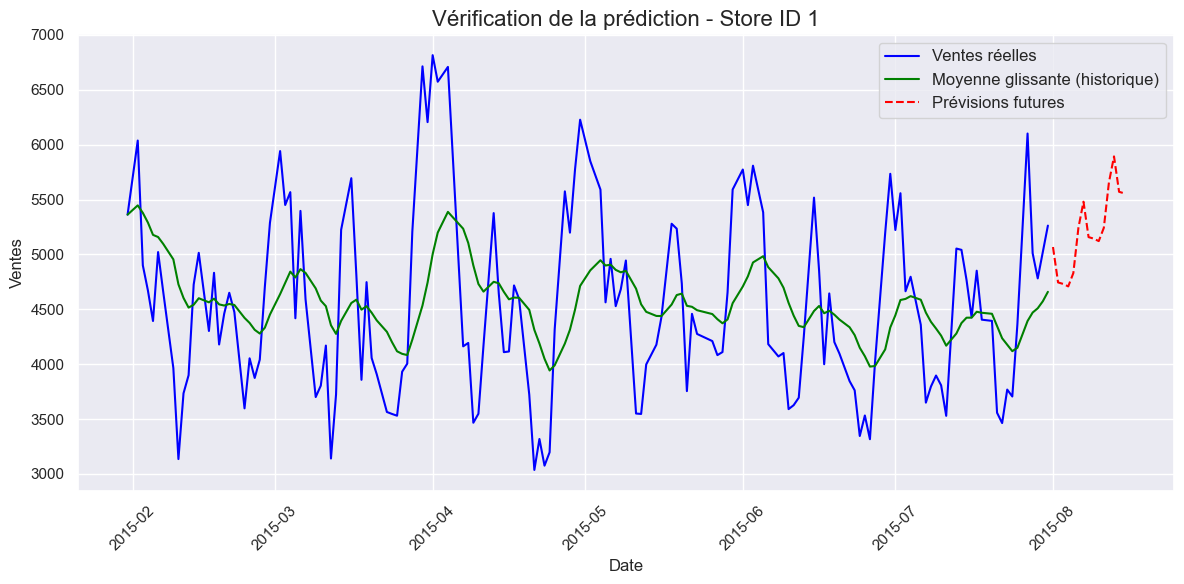

In [57]:
# Définir le Store ID à analyser
store_id = 1

# Filtrer les données pour le Store ID sélectionné et exclure les ventes à 0
store_data = dfmerge[(dfmerge['Store'] == store_id) & (dfmerge['Sales'] > 0)].copy()

# Convertir 'Date' en datetime si ce n'est pas déjà fait
store_data['Date'] = pd.to_datetime(store_data['Date'])

# Trier les données par date
store_data = store_data.sort_values(by='Date')

# Filtrer les données des 6 derniers mois
last_date = store_data['Date'].max()
six_months_ago = last_date - pd.DateOffset(months=6)
store_data = store_data[store_data['Date'] >= six_months_ago]

# Appliquer une moyenne glissante exponentielle pour donner plus de poids aux valeurs récentes
store_data['Sales_Forecast'] = store_data['Sales'].ewm(span=15, adjust=False).mean()

# Identifier la tendance récente (différence moyenne sur les 7 derniers jours)
recent_trend = store_data['Sales_Forecast'].diff().iloc[-7:].mean()

# Générer les 15 prochains jours de dates
future_dates = pd.date_range(start=store_data['Date'].max() + pd.Timedelta(days=1), periods=15)

# Initialiser les prévisions futures en utilisant la dernière valeur connue et la tendance récente
future_sales_forecast = [store_data['Sales_Forecast'].iloc[-1] + (i+1) * recent_trend for i in range(15)]

# Incorporer une saisonnalité hebdomadaire basée sur la moyenne des jours similaires
weekly_pattern = store_data.groupby(store_data['Date'].dt.dayofweek)['Sales'].mean()
future_seasonality = np.tile(weekly_pattern.values, int(np.ceil(15 / len(weekly_pattern))))[:15]

# Ajuster la prévision en ajoutant la saisonnalité normalisée
future_sales_forecast = future_sales_forecast + (future_seasonality - np.mean(future_seasonality))

# Créer un DataFrame pour les prévisions futures
future_df = pd.DataFrame({'Date': future_dates, 'Sales_Forecast': future_sales_forecast})

# Concaténer les données réelles et les prévisions
df_forecast = pd.concat([store_data[['Date', 'Sales_Forecast']], future_df])

plt.figure(figsize=(12, 6))

# Tracer les ventes réelles
plt.plot(store_data['Date'], store_data['Sales'], label='Ventes réelles', linestyle='-', color='blue')

# Tracer la moyenne glissante utilisée (passée)
plt.plot(store_data['Date'], store_data['Sales_Forecast'], label='Moyenne glissante (historique)', linestyle='-', color='green')

# Tracer la prévision (future)
plt.plot(future_df['Date'], future_df['Sales_Forecast'], label='Prévisions futures', linestyle='--', color='red')

# Paramètres du graphique
plt.title(f'Vérification de la prédiction - Store ID {store_id}', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Ventes', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Afficher le graphique
plt.show()

In [58]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Définir la période de test (les 15 derniers jours des données réelles)
test_data = store_data.iloc[-15:]  # Derniers 15 jours réels
predicted_sales = df_forecast.iloc[-15:]['Sales_Forecast'].values  # Dernières 15 prévisions

# Calcul des erreurs
rmsemg = np.sqrt(mean_squared_error(test_data['Sales'], predicted_sales))
maemg = mean_absolute_error(test_data['Sales'], predicted_sales)

# Affichage des métriques
print(f"RMSE: {rmsemg:.2f}")
print(f"MAE: {maemg:.2f}")

RMSE: 991.48
MAE: 815.02


### Modèle Prophet 

14:25:06 - cmdstanpy - INFO - Chain [1] start processing
14:25:07 - cmdstanpy - INFO - Chain [1] done processing


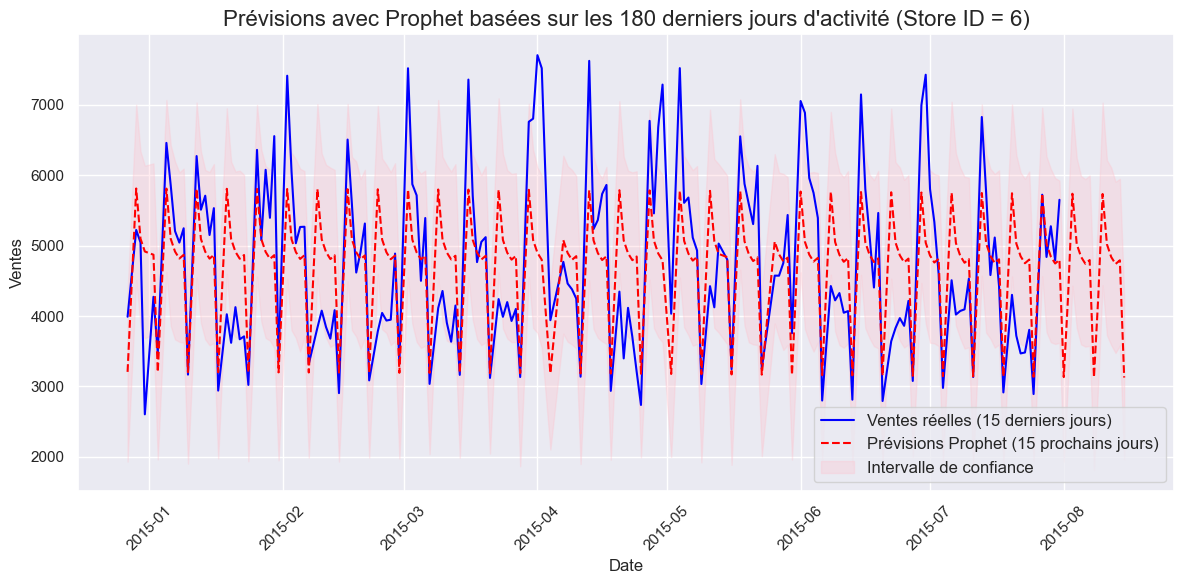

In [60]:
from prophet import Prophet
# Filtrer les données pour Store ID = 1
store_id = 6
store_data = df_merge[(df_merge['Store'] == store_id) & (df_merge['Sales'] > 0)].copy()

# Trier les données par date
store_data = store_data.sort_values(by='Date')

# Utiliser uniquement les 180 derniers jours d'activité pour le modèle
store_data_last_15_days = store_data.tail(180).rename(columns={'Date': 'ds', 'Sales': 'y'})

# Créer et ajuster le modèle Prophet
model = Prophet()
model.fit(store_data_last_15_days)

# Créer une dataframe future pour prédire les 15 prochains jours
future = model.make_future_dataframe(periods=15)  # Étendre de 15 jours
forecast = model.predict(future)

# Visualisation des prévisions
plt.figure(figsize=(12, 6))
plt.plot(store_data_last_15_days['ds'], store_data_last_15_days['y'], label='Ventes réelles (15 derniers jours)', marker='', linestyle='-', color='blue')
plt.plot(forecast['ds'], forecast['yhat'], label='Prévisions Prophet (15 prochains jours)', linestyle='--', color='red')

# Intervalle de confiance
plt.fill_between(
    forecast['ds'], 
    forecast['yhat_lower'], 
    forecast['yhat_upper'], 
    color='pink', 
    alpha=0.3, 
    label='Intervalle de confiance'
)

# Paramètres du graphique
plt.title(f'Prévisions avec Prophet basées sur les 180 derniers jours d\'activité (Store ID = {store_id})', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Ventes', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Afficher le graphique
plt.show()

### Modèle SARIMA

C:\Users\Amine\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Amine\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Amine\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC: 4538.505074794468, BIC: 4570.481711058763


C:\Users\Amine\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Amine\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


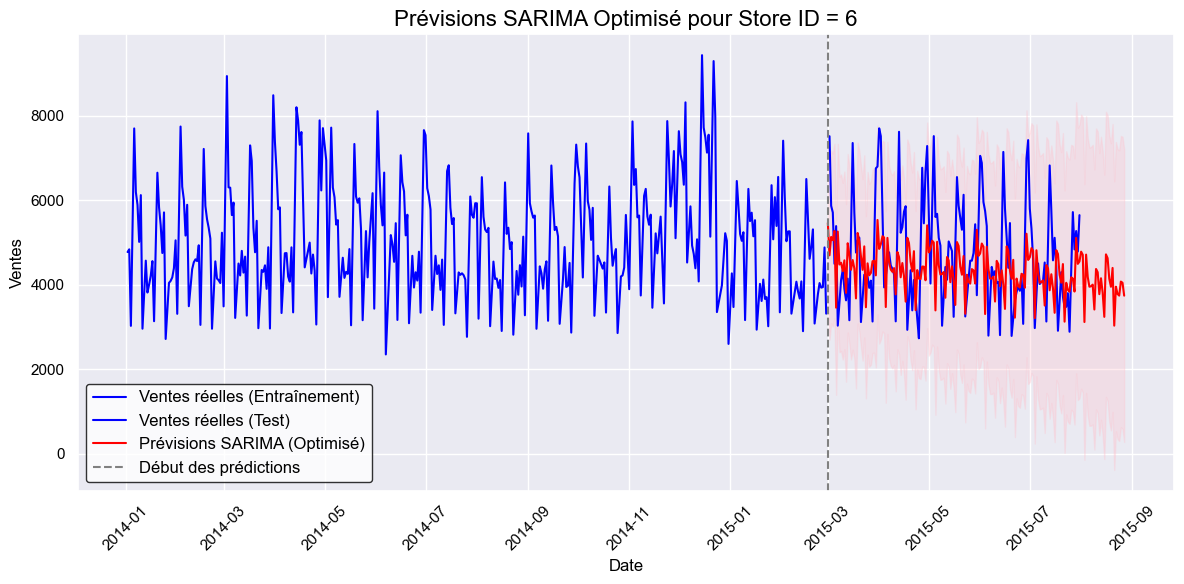

In [62]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Charger les données et exclure les ventes nulles
store_id = 6
store_data = dfmerge[(dfmerge['Store'] == store_id) & (dfmerge['Sales'] > 0)].copy()
store_data['Date'] = pd.to_datetime(store_data['Date'])
store_data = store_data.sort_values(by='Date')

# Définition des périodes
train_start_date = "2014-01-01"
train_end_date = "2015-02-28"
forecast_start_date = "2015-03-01"
forecast_steps = 6 * 30  # Prédictions sur 6 mois

train_data = store_data[(store_data['Date'] >= train_start_date) & (store_data['Date'] <= train_end_date)]
test_data = store_data[store_data['Date'] >= forecast_start_date]

# Entraînement SARIMA avec saisonnalité ajustée
sarima_model = SARIMAX(
    train_data.set_index('Date')['Sales'],
    order=(2, 1, 2),
    seasonal_order=(2, 1, 2, 30),  # Saison mensuelle au lieu de hebdomadaire pour de meilleur résultat 
    enforce_stationarity=False,
    enforce_invertibility=False
)
sarima_result = sarima_model.fit(disp=False)

# Vérifier AIC/BIC
print(f"AIC: {sarima_result.aic}, BIC: {sarima_result.bic}")

# Générer les prévisions
future_forecast = sarima_result.get_forecast(steps=forecast_steps)
future_mean = future_forecast.predicted_mean
future_conf_int = future_forecast.conf_int()

#  Ajouter de la variabilité dans les prévisions
future_values = np.random.normal(
    loc=future_mean,
    scale=(future_conf_int.iloc[:, 1] - future_conf_int.iloc[:, 0]) / 4
)

# Appliquer une moyenne mobile pour lisser sans écraser la variabilité
future_values = pd.Series(future_values).rolling(window=7, min_periods=1).mean()

# Générer l'index des prédictions
forecast_dates = pd.date_range(start=forecast_start_date, periods=forecast_steps)

#  Générer les prévisions avec intervalle de confiance réduit
future_forecast = sarima_result.get_forecast(steps=forecast_steps, alpha=0.2)  # Intervalle de confiance à 80%
future_values = future_forecast.predicted_mean
future_conf_int = future_forecast.conf_int()

#  Réduire l’incertitude de 50% (facteur ajustable)
confidence_scale = 0.5
future_conf_int.iloc[:, 0] += confidence_scale * (future_forecast.predicted_mean - future_conf_int.iloc[:, 0])
future_conf_int.iloc[:, 1] -= confidence_scale * (future_conf_int.iloc[:, 1] - future_forecast.predicted_mean)

#  Générer l’index des prédictions
forecast_dates = pd.date_range(start=forecast_start_date, periods=forecast_steps)

#  Visualisation améliorée
plt.figure(figsize=(12, 6))

# Ventes réelles (train)
plt.plot(train_data['Date'], train_data['Sales'], label='Ventes réelles (Entraînement)', linestyle='-', color='blue')
# Ventes réelles (test)
plt.plot(test_data['Date'], test_data['Sales'], label='Ventes réelles (Test)', linestyle='-', color='blue')

# Prédictions futures ajustées
plt.plot(forecast_dates, future_values, label='Prévisions SARIMA (Optimisé)', linestyle='-', color='red')
plt.fill_between(
    forecast_dates,
    future_conf_int.iloc[:, 0],
    future_conf_int.iloc[:, 1],
    color='pink',
    alpha=0.3
)

# Marquer la séparation entre entraînement et prédiction
plt.axvline(x=pd.to_datetime(forecast_start_date), color='gray', linestyle='--', label='Début des prédictions')

# Paramètres du graphique
plt.title(f'Prévisions SARIMA Optimisé pour Store ID = {store_id}', fontsize=16, color='black')
plt.xlabel('Date', fontsize=12, color='black')
plt.ylabel('Ventes', fontsize=12, color='black')
plt.legend(fontsize=12, facecolor='white', edgecolor='black', labelcolor='black')
plt.grid(True)
plt.xticks(rotation=45, color='black')
plt.yticks(color='black')
plt.tight_layout()
plt.show()


In [63]:
#  Calcul des métriques d'erreur
rmsesarima = np.sqrt(mean_squared_error(test_data['Sales'][:forecast_steps], future_values[:len(test_data)]))
maesarima = mean_absolute_error(test_data['Sales'][:forecast_steps], future_values[:len(test_data)])
print(f"RMSE: {rmsesarima:.2f}, MAE: {maesarima:.2f}")


RMSE: 1403.31, MAE: 1135.03


## 4. Évaluez la performance du modèle de prévision sur les différents groupes de magasin 

Analyse du Cluster ID 0


C:\Users\Amine\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Amine\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Amine\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Analyse du Cluster ID 1


C:\Users\Amine\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Amine\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Amine\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Amine\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Amine\anaconda3\Lib\site-packages\statsmode

Analyse du Cluster ID 3
Analyse du Cluster ID 2


C:\Users\Amine\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Amine\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Amine\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Amine\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


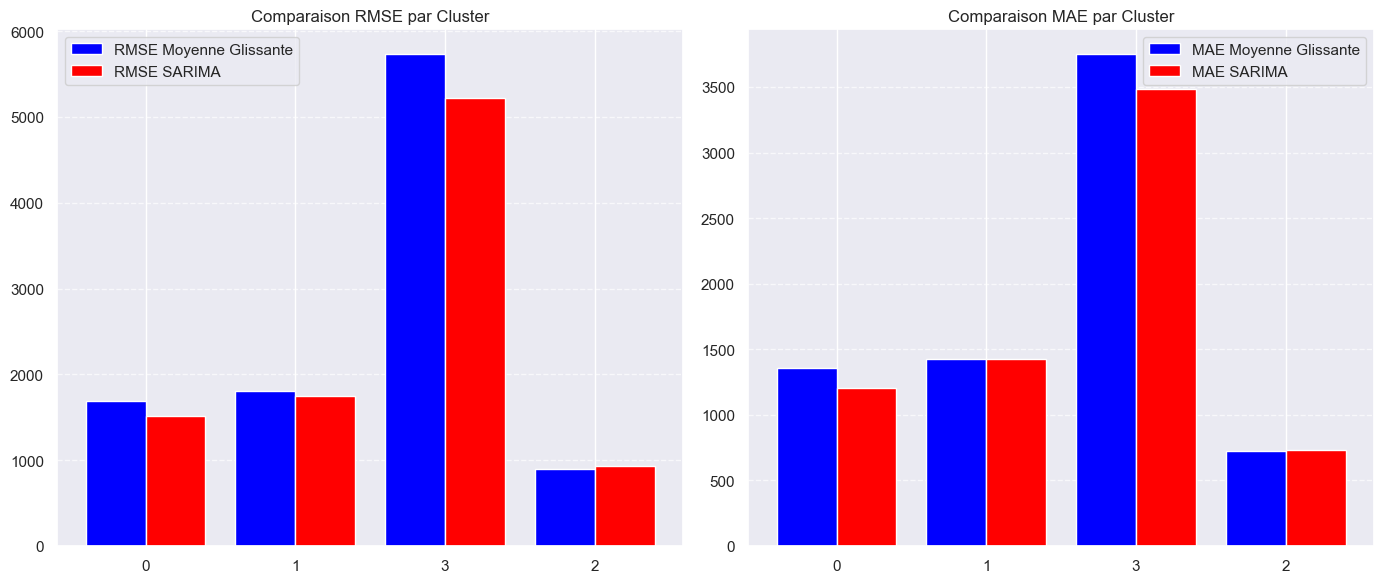

In [65]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Sélectionner un magasin représentatif pour chaque cluster K-Means
cluster_ids = dfmerge['Cluster'].unique()
results = []

for cluster_id in cluster_ids:
    print(f"Analyse du Cluster ID {cluster_id}")
    store_id = dfmerge[dfmerge['Cluster'] == cluster_id].groupby("Store")["Sales"].count().idxmax()
    store_data = dfmerge[(dfmerge['Store'] == store_id) & (dfmerge['Sales'] > 0)].copy()
    store_data['Date'] = pd.to_datetime(store_data['Date'])
    store_data = store_data.sort_values(by='Date')

    train_start_date = "2014-01-01"
    train_end_date = "2015-02-28"
    forecast_start_date = "2015-03-01"
    forecast_steps = 6 * 30

    train_data = store_data[(store_data['Date'] >= train_start_date) & (store_data['Date'] <= train_end_date)]
    test_data = store_data[store_data['Date'] >= forecast_start_date]

    # Moyenne Glissante
    train_data['Sales_Forecast_MG'] = train_data['Sales'].ewm(span=15, adjust=False).mean()
    test_data['Sales_Forecast_MG'] = train_data['Sales_Forecast_MG'].iloc[-1]

    # SARIMA
    sarima_model = SARIMAX(
        train_data.set_index('Date')['Sales'],
        order=(2, 1, 2),
        seasonal_order=(2, 1, 2, 30),
        enforce_stationarity=False,
        enforce_invertibility=False
    )
    sarima_result = sarima_model.fit(disp=False)

    # Générer les prévisions
    future_forecast = sarima_result.get_forecast(steps=forecast_steps)
    future_values = future_forecast.predicted_mean
    future_conf_int = future_forecast.conf_int()

    # Réduction de l’incertitude
    confidence_scale = 0.5
    future_conf_int.iloc[:, 0] += confidence_scale * (future_forecast.predicted_mean - future_conf_int.iloc[:, 0])
    future_conf_int.iloc[:, 1] -= confidence_scale * (future_conf_int.iloc[:, 1] - future_forecast.predicted_mean)

    forecast_dates = pd.date_range(start=forecast_start_date, periods=forecast_steps)

    actual_sales = test_data.set_index('Date')['Sales']

    # Calcul des KPI
    rmse_moving_avg = np.sqrt(mean_squared_error(actual_sales, test_data['Sales_Forecast_MG']))
    mae_moving_avg = mean_absolute_error(actual_sales, test_data['Sales_Forecast_MG'])
    rmse_sarima = np.sqrt(mean_squared_error(actual_sales, future_values[:len(test_data)]))
    mae_sarima = mean_absolute_error(actual_sales, future_values[:len(test_data)])

    results.append({
        'Cluster_ID': cluster_id,
        'RMSE_Moving_Avg': rmse_moving_avg, 'MAE_Moving_Avg': mae_moving_avg,
        'RMSE_SARIMA': rmse_sarima, 'MAE_SARIMA': mae_sarima
    })

# Convertir en DataFrame
results_df = pd.DataFrame(results)

# Visualisation
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
width = 0.4
x = np.arange(len(results_df['Cluster_ID']))

ax[0].bar(x - width/2, results_df['RMSE_Moving_Avg'], width, label='RMSE Moyenne Glissante', color='blue')
ax[0].bar(x + width/2, results_df['RMSE_SARIMA'], width, label='RMSE SARIMA', color='red')
ax[0].set_title("Comparaison RMSE par Cluster")
ax[0].set_xticks(x)
ax[0].set_xticklabels(results_df['Cluster_ID'])
ax[0].legend()
ax[0].grid(axis='y', linestyle='--', alpha=0.7)

ax[1].bar(x - width/2, results_df['MAE_Moving_Avg'], width, label='MAE Moyenne Glissante', color='blue')
ax[1].bar(x + width/2, results_df['MAE_SARIMA'], width, label='MAE SARIMA', color='red')
ax[1].set_title("Comparaison MAE par Cluster")
ax[1].set_xticks(x)
ax[1].set_xticklabels(results_df['Cluster_ID'])
ax[1].legend()
ax[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()